In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris


def find_centroid(df, k, d):
    centroid = np.zeros((k, d))  # initialize dimensions of centroids.
    for i in range(k):  # search for clusters.
        for j in range(d):  # search for dimensions.
            # find mean for jth dimension of the datapoints in k = i cluster.
            centroid[i, j] = df[df["k"] == i].iloc[:, j].mean()
    return centroid


def assign_cluster(df, k, d, centroid):
    # initialize a temparory space to store Euclidean distances.
    temp = np.zeros(k)
    for x in range(df.shape[0]):
        # locate a datapoint in numpy format.
        point = df.iloc[x, 0:d].to_numpy()
        for y in range(k):
            diff = point - centroid[y, :]  # vector subtraction.
            temp[y] = np.dot(diff.T, diff)  # dot product of the vector subtraction.
        # assign the closest centroid/cluster to the data point.
        df.iloc[x, -1] = np.argmin(temp)
    return


def lloyd(df, k, max_iter=100):
    # Find the dimension of the datapoints.
    d = df.shape[1]
    # randomly assign all points to a centroid/cluster.
    df["k"] = np.random.randint(0, k, size=len(df))
    # Calculate the centroids as mean of their assigned points.
    centroid = find_centroid(df, k, d)
    # initialize while loop.
    iter = 0
    dif_centroid = np.ones((k, d))
    threshold = np.ones((k, d)) * 0
    while np.any(dif_centroid>threshold) and iter < max_iter:
        centroid_before = centroid # update centroid_result.
        iter += 1 # update number of iterations.
        # reassign each datapoint to its closest centroid.
        assign_cluster(df, k, d, centroid)
        # recalculate the centroid.
        centroid = find_centroid(df, k, d)
        # check if the centroid has moved.
        dif_centroid = np.abs(centroid_before-centroid)
        # plot sepal.
        plt.figure(iter)
        f, axes = plt.subplots(1, 2)
        sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="k", data=df, ax=axes[0]).set_title(f"{iter} iteration")
        axes[0].plot(centroid[:,0], centroid[:,1], 'x', color='red', label='centroids')
        # plot petal.
        sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="k", data=df, ax=axes[1]).set_title(f"{iter} iteration")
        axes[1].plot(centroid[:,2], centroid[:,3], 'x', color='red', label='centroids')
        plt.tight_layout()
    return centroid, df, iter

def macqueen(df, k, max_iter=100):
    # Find the dimension of the datapoints.
    d = df.shape[1]
    # Find number of datapoints n.
    n = df.shape[0]
    # add an empty column for cluster labels.
    df["k"] = ""
    # randomly choose k datapoints as centroids.
    # choose indices of df which are chosen to be the initial centroids.
    i_rnd = np.random.choice(n, k, replace=False)
    centroid = np.zeros((k, d))  # initialize dimensions of centroids.
    for i in range(k):
        centroid[i,:] = df.iloc[i_rnd[i], :d]
        df.at[i_rnd[i],"k"] = i # label cluster to initial centroid datapoints.
    # initialize while loop.
    iter = 0
    dif_centroid = np.ones((k, d))
    threshold = np.ones((k, d)) * 0
    while np.any(dif_centroid>threshold) and iter < max_iter:
        centroid_before = centroid # update centroid_result.
        iter += 1 # update number of iterations.
        # assign each datapoint to its closest centroid.
        assign_cluster(df, k, d, centroid)
        # recalculate the centroid.
        centroid = find_centroid(df, k, d)
        # check if the centroid has moved.
        dif_centroid = np.abs(centroid_before-centroid)
        # plot sepal.
        plt.figure(iter)
        f, axes = plt.subplots(1, 2)
        sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="k", data=df, ax=axes[0]).set_title(f"{iter} iteration")
        axes[0].plot(centroid[:,0], centroid[:,1], 'x', color='red', label='centroids')
        # plot petal.
        sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="k", data=df, ax=axes[1]).set_title(f"{iter} iteration")
        axes[1].plot(centroid[:,2], centroid[:,3], 'x', color='red', label='centroids')
        plt.tight_layout()
    return centroid, df, iter

def hartigan(df, k, max_iter=100):
    # Find the dimension of the datapoints.
    d = df.shape[1]
    # Find number of datapoints n.
    n = df.shape[0]
    # randomly assign all points to a centroid/cluster.
    df["k"] = np.random.randint(0, k, size=len(df))
    # Calculate the centroids as mean of their assigned points.
    centroid = find_centroid(df, k, d)
    # initialize while loop.
    iter = 0
    dif_centroid = np.ones((k, d))
    threshold = np.ones((k, d)) * 0
    while np.any(dif_centroid>threshold) and iter < max_iter:
        for x in range(n): # for each datapoint, find closest centroid.
            df_datapoint = df.iloc[x].copy().to_frame()
            assign_cluster(df_datapoint, k, d, centroid)
        # recalculate the centroids as mean of their assigned points.
        centroid = find_centroid(df, k, d)
        centroid_before = centroid # update centroid_result.
        iter += 1 # update number of iterations.
        # assign each datapoint to its closest centroid.
        assign_cluster(df, k, d, centroid)
        # recalculate the centroid.
        centroid = find_centroid(df, k, d)
        # check if the centroid has moved.
        dif_centroid = np.abs(centroid_before-centroid)
        # plot sepal.
        plt.figure(iter)
        f, axes = plt.subplots(1, 2)
        sns.scatterplot(x="sepal length (cm)", y="sepal width (cm)", hue="k", data=df, ax=axes[0]).set_title(f"{iter} iteration")
        axes[0].plot(centroid[:,0], centroid[:,1], 'x', color='red', label='centroids')
        # plot petal.
        sns.scatterplot(x="petal length (cm)", y="petal width (cm)", hue="k", data=df, ax=axes[1]).set_title(f"{iter} iteration")
        axes[1].plot(centroid[:,2], centroid[:,3], 'x', color='red', label='centroids')
        plt.tight_layout()
    return centroid, df, iter

Lloyd Algorithm

Lloyd Algorithm: 
centroiods are: 
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
0 -cluster has  61  points.
1 -cluster has  50  points.
2 -cluster has  39  points.
Lloyd Algorithm took 12 iterations.


<Figure size 640x480 with 0 Axes>

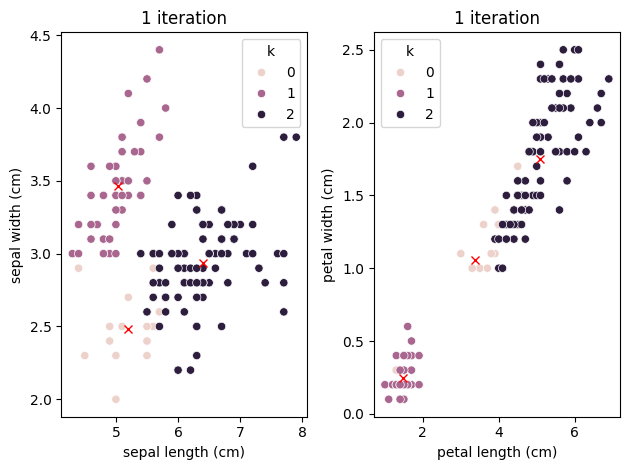

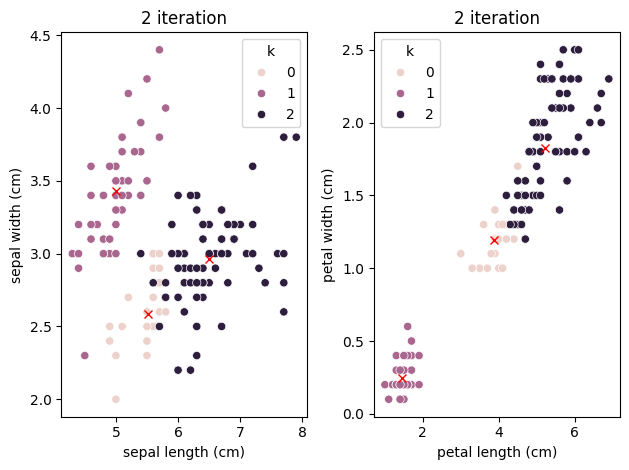

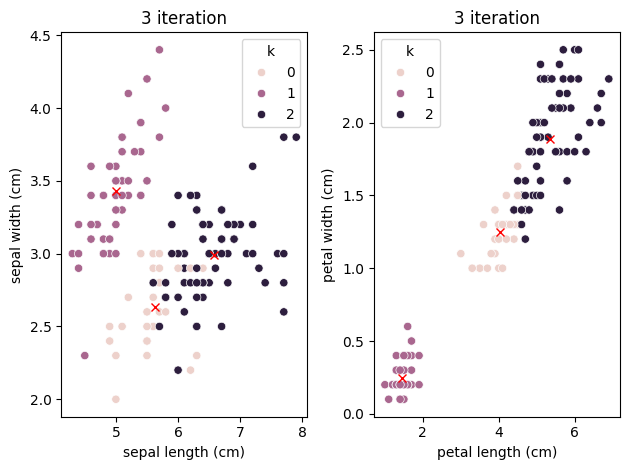

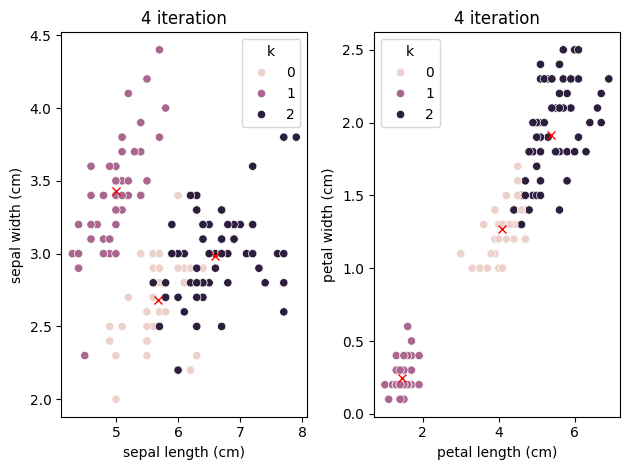

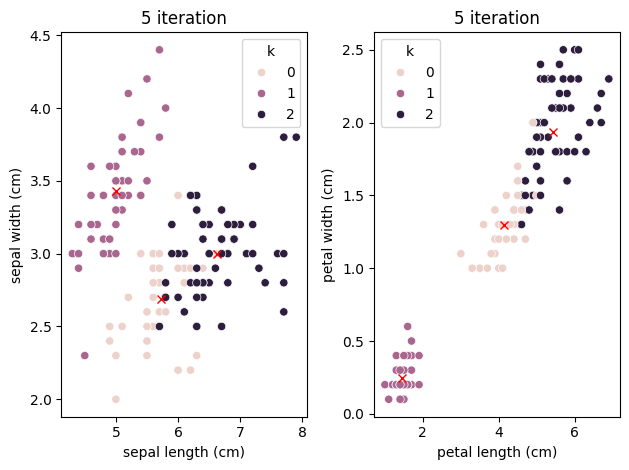

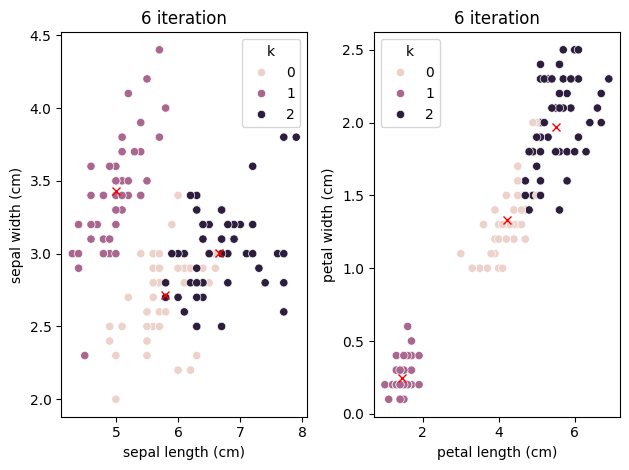

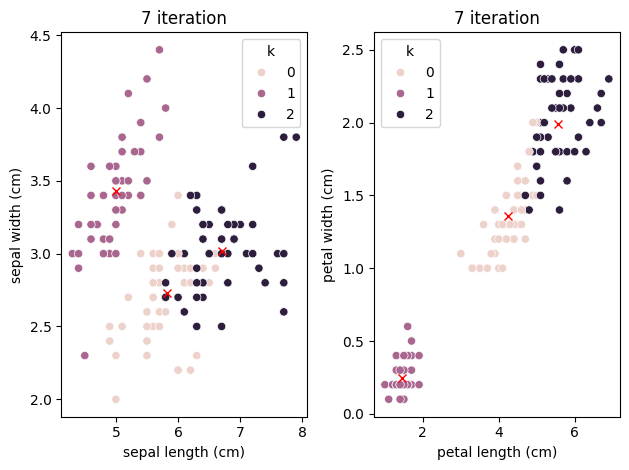

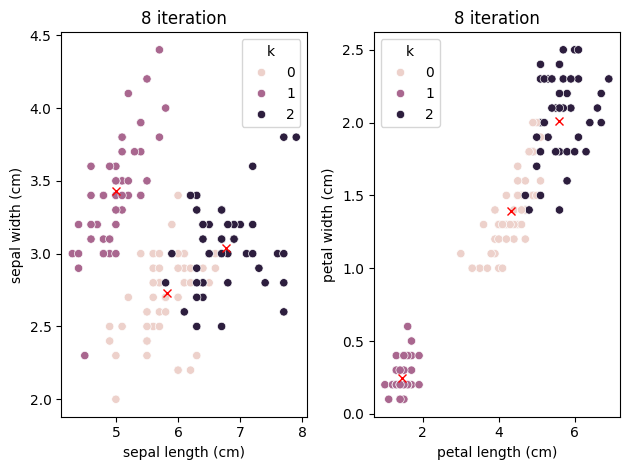

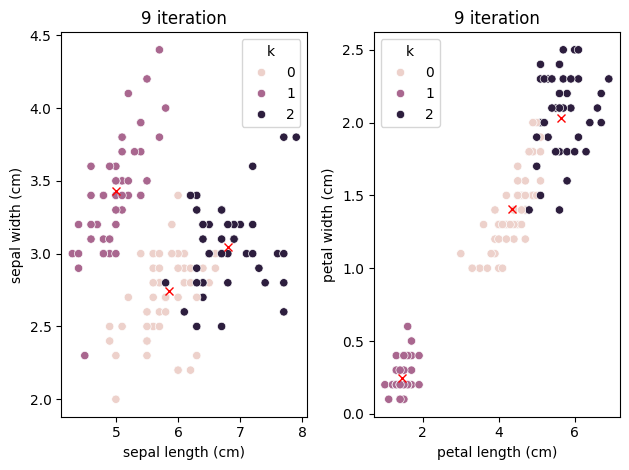

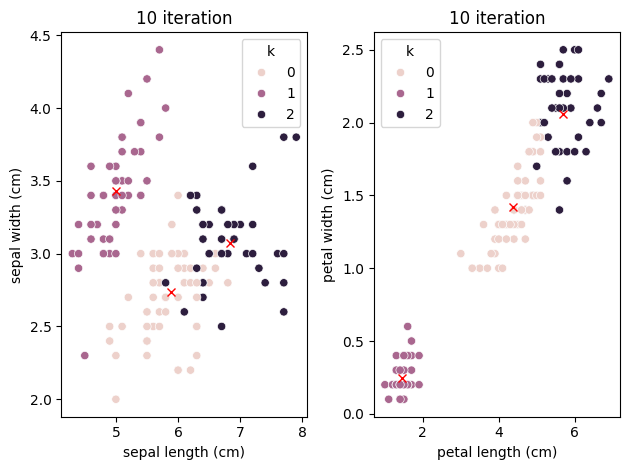

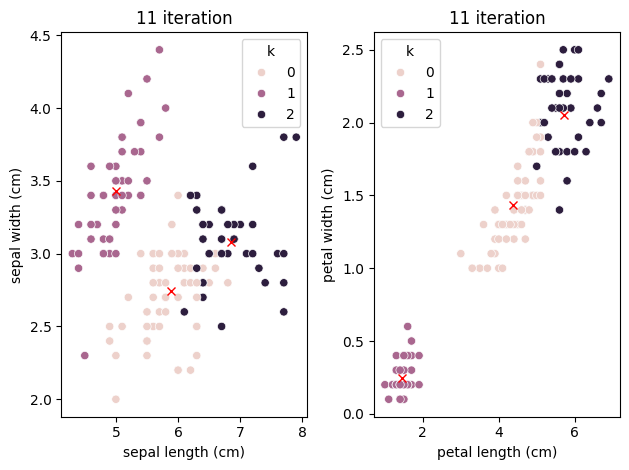

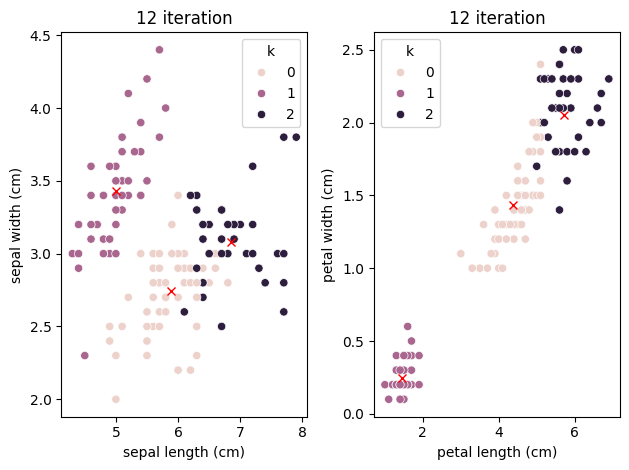

In [118]:
# Set number of clusters k.
k = 3

# Load the dataset from scikit-learn.
iris = load_iris()

# Create a dataframe.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Fix the seed for the random number generator for reproducibility.
np.random.seed(42)

# Lloyd Algorithm
centroid, df, iter = lloyd(df, k)
print("Lloyd Algorithm: ")
print(f"centroiods are: \n{centroid}")
for x in range(k):
    print(x,"-cluster has ",df[df["k"] == x].shape[0]," points.")
print(f"Lloyd Algorithm took {iter} iterations.")

Mac Queen Algorithm

Mac Queen Algorithm: 
centroiods are: 
[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
0 -cluster has  62  points.
1 -cluster has  50  points.
2 -cluster has  38  points.
Mac Queen Algorithm took 6 iterations.


<Figure size 640x480 with 0 Axes>

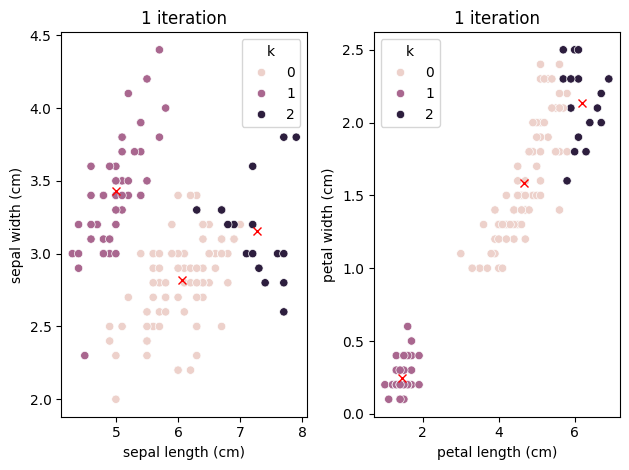

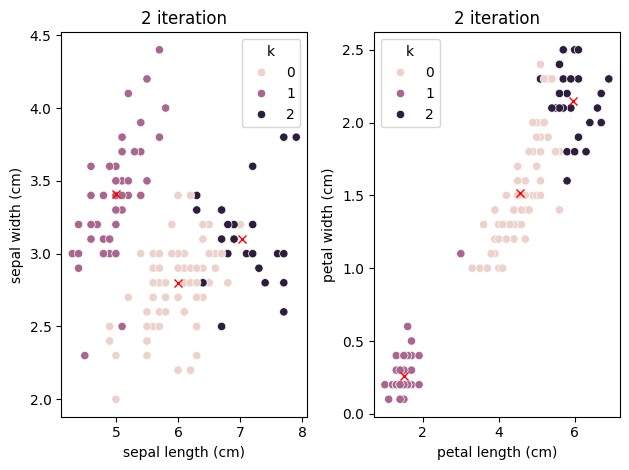

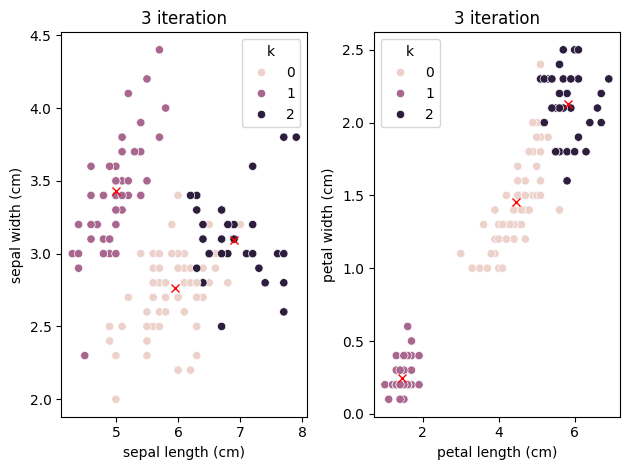

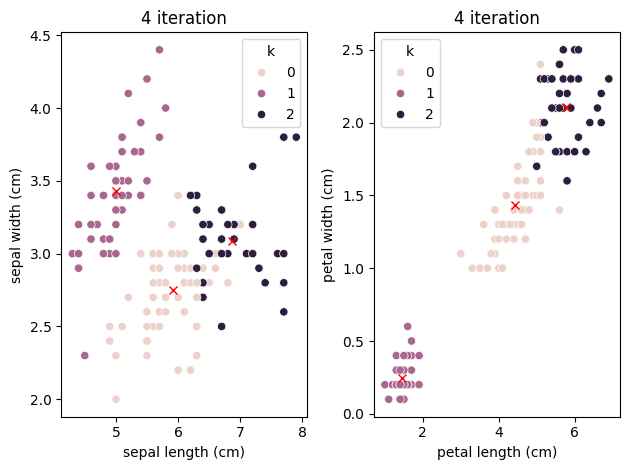

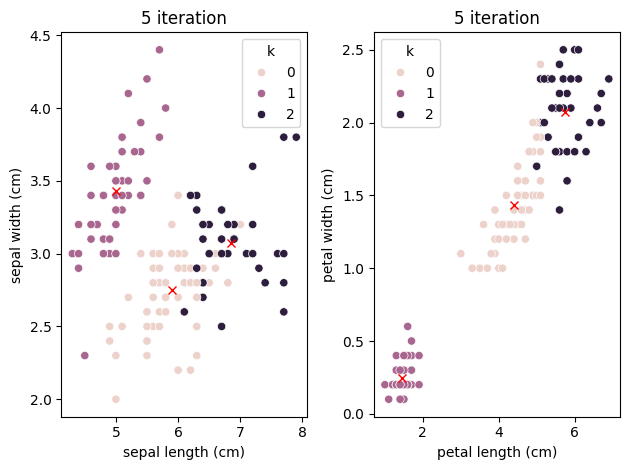

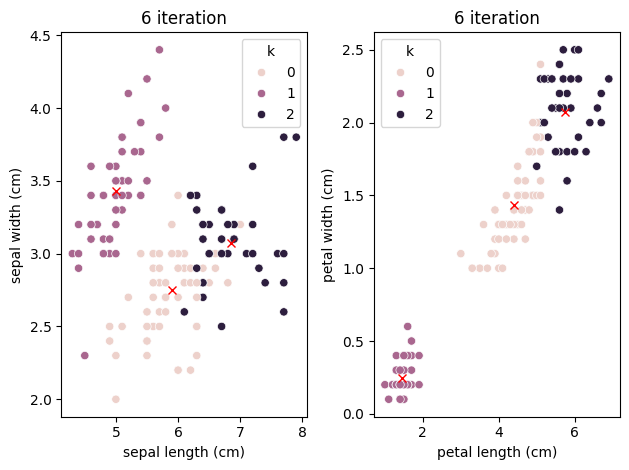

In [119]:
# Set number of clusters k.
k = 3

# Load the dataset from scikit-learn.
iris = load_iris()

# Create a dataframe.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Fix the seed for the random number generator for reproducibility.
np.random.seed(42)

# Mac Queen Algorithm
centroid, df, iter = macqueen(df, k)
print("Mac Queen Algorithm: ")
print(f"centroiods are: \n{centroid}")
for x in range(k):
    print(x,"-cluster has ",df[df["k"] == x].shape[0]," points.")
print(f"Mac Queen Algorithm took {iter} iterations.")

Hartigan-Wong Algorithm

Hartigan-Wong Algorithm: 
centroiods are: 
[[5.88360656 2.74098361 4.38852459 1.43442623]
 [5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]]
0 -cluster has  61  points.
1 -cluster has  50  points.
2 -cluster has  39  points.
Hartigan-Wong Algorithm took 12 iterations.


<Figure size 640x480 with 0 Axes>

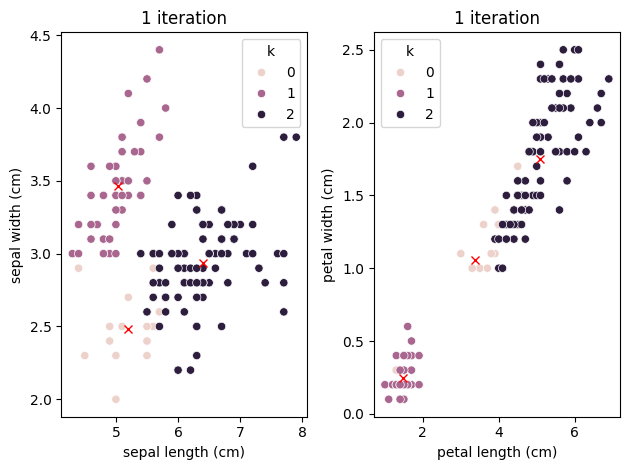

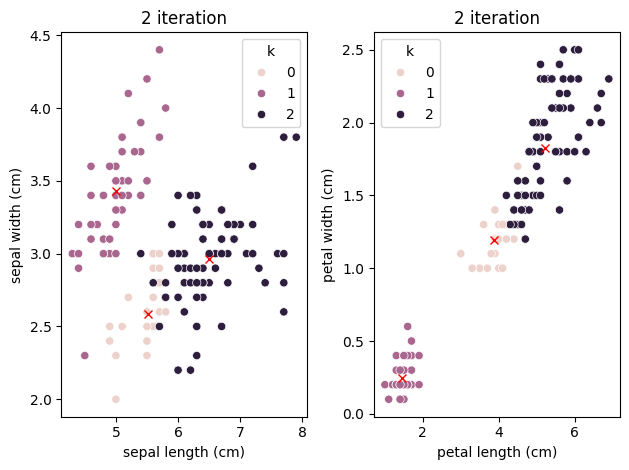

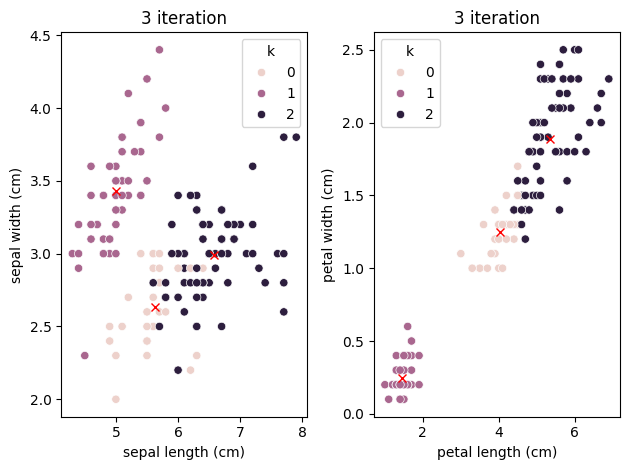

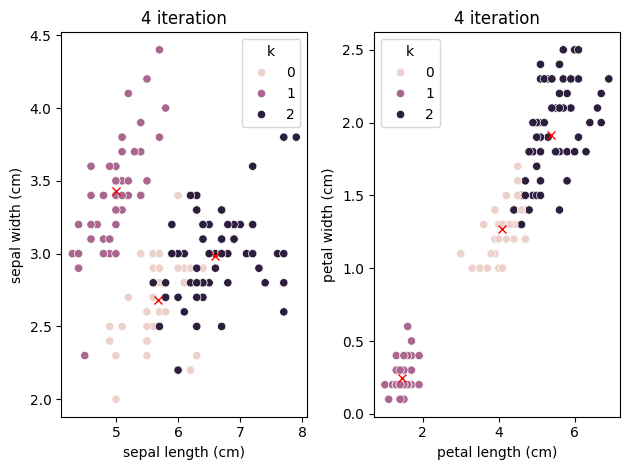

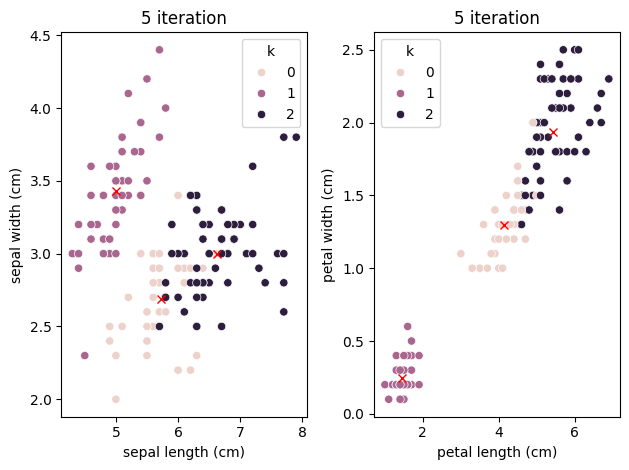

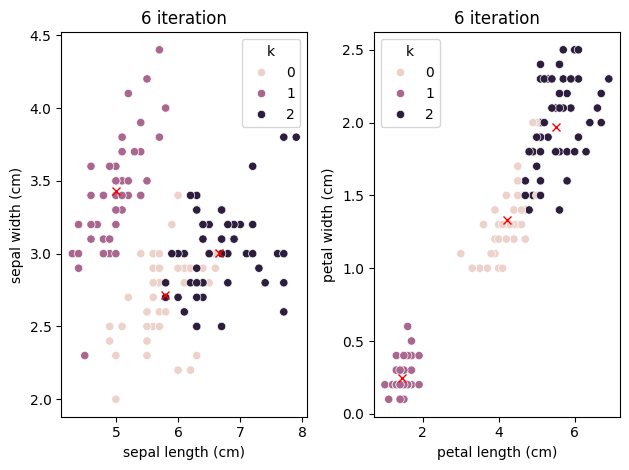

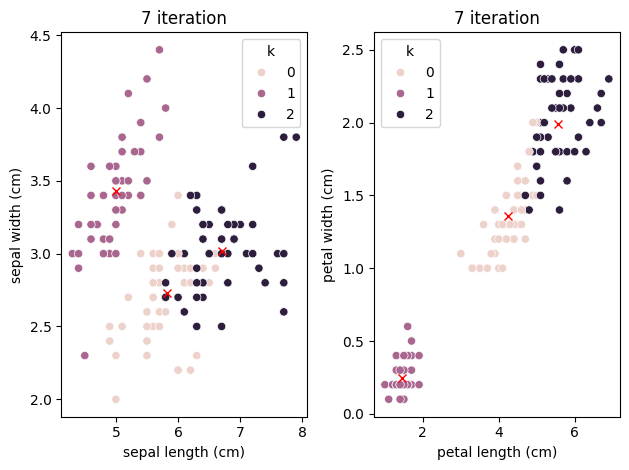

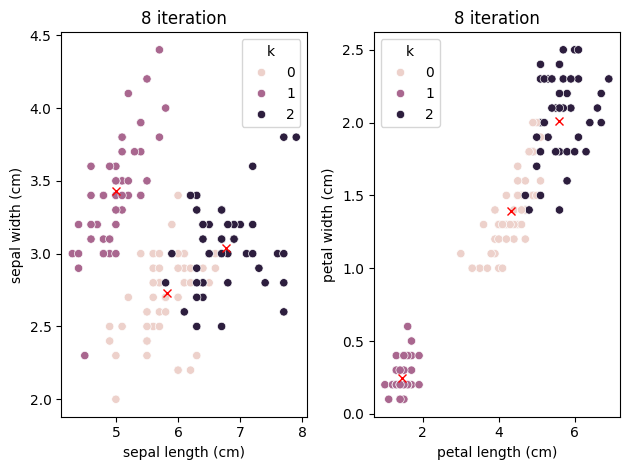

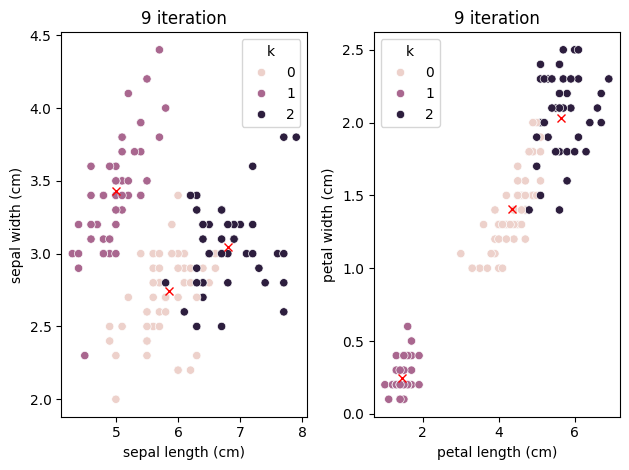

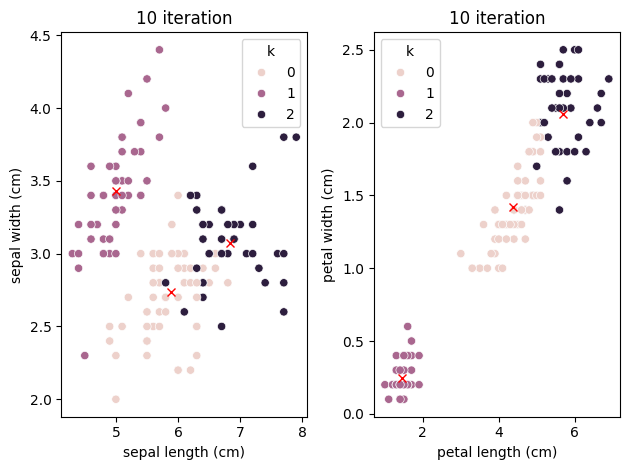

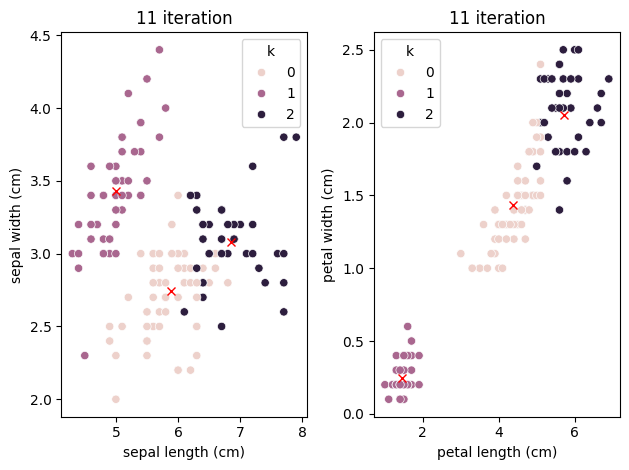

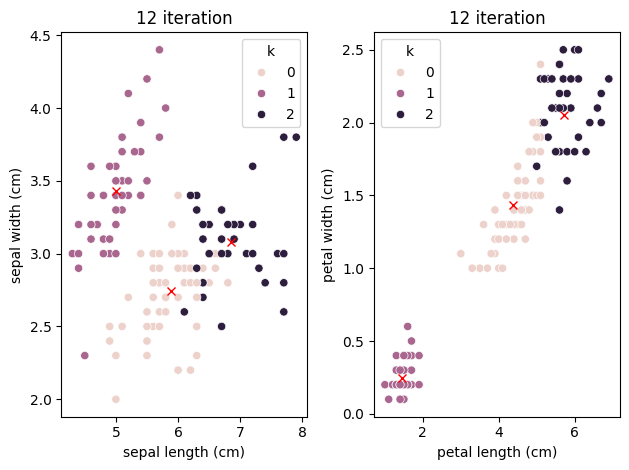

In [120]:
# Set number of clusters k.
k = 3

# Load the dataset from scikit-learn.
iris = load_iris()

# Create a dataframe.
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Fix the seed for the random number generator for reproducibility.
np.random.seed(42)

# Hartigan-Wong Algorithm
centroid, df, iter = hartigan(df, k)
print("Hartigan-Wong Algorithm: ")
print(f"centroiods are: \n{centroid}")
for x in range(k):
    print(x,"-cluster has ",df[df["k"] == x].shape[0]," points.")
print(f"Hartigan-Wong Algorithm took {iter} iterations.")

In [69]:
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     k  
0    1  
1    1  
